# **1. Perkenalan Dataset**


**1. Perkenalan Dataset**

**Dataset: House Prices - Advanced Regression Techniques**

**Sumber Dataset:**
Dataset ini berasal dari **Kaggle Competition** yang berfokus pada prediksi harga rumah di Ames, Iowa.
- **Link:** https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques
- **Type:** Regression Problem
- **Target Variable:** SalePrice (harga jual rumah dalam USD)

**Deskripsi Dataset:**
Dataset ini berisi informasi detail tentang properti residensial dengan **79 fitur explanatory variables** yang menggambarkan hampir setiap aspek dari rumah, termasuk:
- **Karakteristik Fisik:** Luas tanah, luas bangunan, jumlah kamar, dll
- **Kualitas & Kondisi:** Overall quality, material finishing, kondisi bangunan
- **Lokasi:** Neighborhood, zoning classification
- **Fasilitas:** Garage, basement, porch, pool, dll
- **Temporal:** Tahun dibangun, tahun renovasi, tahun terjual

**Tujuan Proyek:**
Membangun **Machine Learning System** end-to-end yang mampu:
1. Melakukan preprocessing data secara otomatis
2. Melatih model dengan hyperparameter tuning
3. Mengimplementasikan CI/CD pipeline
4. Monitoring & logging model performance

**Dataset Statistics:**
- **Training Data:** 1,460 records
- **Test Data:** 1,459 records (untuk Kaggle submission)
- **Features:** 79 explanatory variables + 1 target (SalePrice)
- **Feature Types:** 
  - Numerical: 38 features
  - Categorical: 43 features
- **Missing Values:** Yes (beberapa features memiliki missing values)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# ===== DATA MANIPULATION =====
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ===== VISUALIZATION =====
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ===== PREPROCESSING =====
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.impute import SimpleImputer

# ===== STATISTICAL ANALYSIS =====
from scipy import stats
from scipy.stats import norm, skew

# ===== UTILITIES =====
import os
import pickle
from datetime import datetime

print("✅ All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✅ All libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.4.2


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# ===== LOAD DATASET =====
# Path ke dataset
train_path = '../dataset_raw/train.csv'
test_path = '../dataset_raw/test.csv'

# Load training data
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

print("=" * 60)
print("DATASET LOADED SUCCESSFULLY")
print("=" * 60)
print(f"\n📊 Training Data Shape: {df_train.shape}")
print(f"📊 Test Data Shape: {df_test.shape}")
print(f"\n✅ Total Features: {df_train.shape[1] - 1}")
print(f"✅ Target Variable: SalePrice")
print(f"✅ Training Samples: {len(df_train)}")
print(f"✅ Test Samples: {len(df_test)}")

DATASET LOADED SUCCESSFULLY

📊 Training Data Shape: (1460, 81)
📊 Test Data Shape: (1459, 80)

✅ Total Features: 80
✅ Target Variable: SalePrice
✅ Training Samples: 1460
✅ Test Samples: 1459


In [3]:
# ===== PREVIEW TRAINING DATA =====
print("=" * 60)
print("FIRST 5 ROWS OF TRAINING DATA")
print("=" * 60)
display(df_train.head())

print("\n" + "=" * 60)
print("DATASET INFO")
print("=" * 60)
print(df_train.info())

print("\n" + "=" * 60)
print("STATISTICAL SUMMARY")
print("=" * 60)
display(df_train.describe())

FIRST 5 ROWS OF TRAINING DATA


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

4. EXPLORATORY DATA ANALYSIS (EDA)

📊 ANALISIS DISTRIBUSI TARGET VARIABLE (SalePrice)

Mean SalePrice: $180,921.20
Median SalePrice: $163,000.00
Std SalePrice: $79,442.50
Min SalePrice: $34,900.00
Max SalePrice: $755,000.00

Skewness: 1.8829
Kurtosis: 6.5363


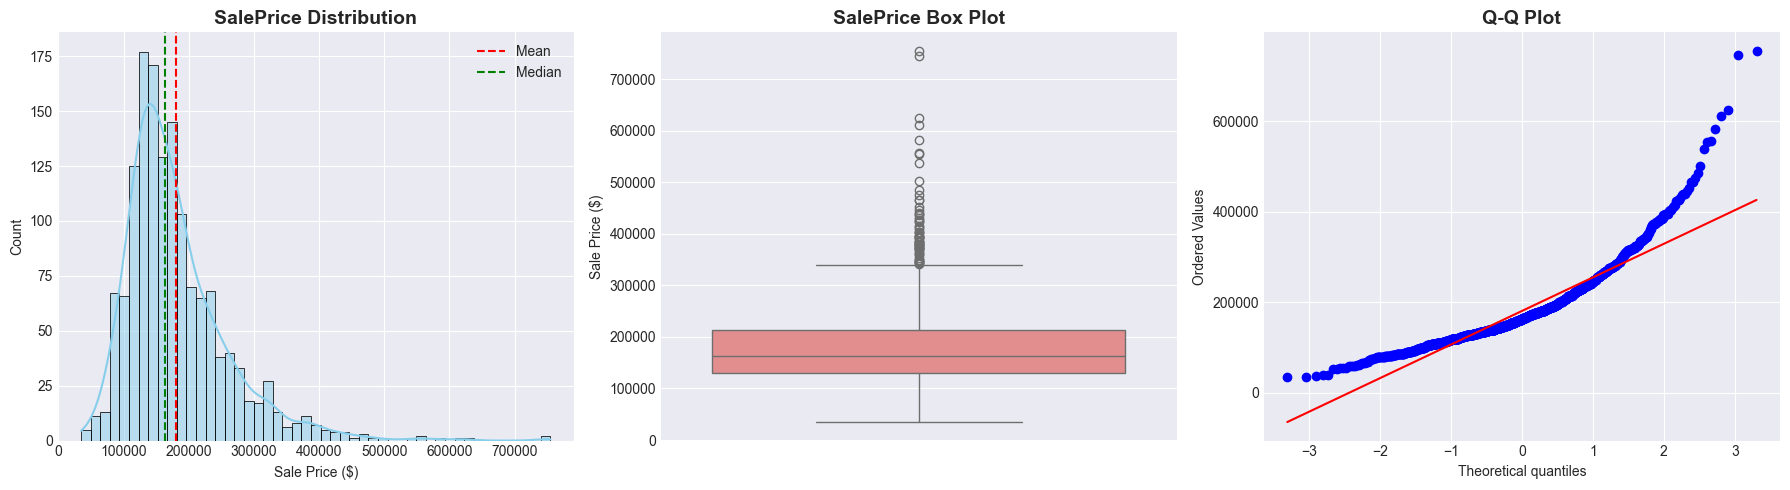


📌 Observation:
- SalePrice memiliki right-skewed distribution (positive skew)
- Terdapat beberapa outliers pada harga tinggi
- Distribusi tidak normal (Q-Q plot menunjukkan deviation)
- Perlu log transformation untuk normalisasi


In [4]:
# ===== EXPLORATORY DATA ANALYSIS (EDA) =====
print("=" * 60)
print("4. EXPLORATORY DATA ANALYSIS (EDA)")
print("=" * 60)

# ===== ANALISIS TARGET VARIABLE: SalePrice =====
print("\n📊 ANALISIS DISTRIBUSI TARGET VARIABLE (SalePrice)\n")

# Statistics
print(f"Mean SalePrice: ${df_train['SalePrice'].mean():,.2f}")
print(f"Median SalePrice: ${df_train['SalePrice'].median():,.2f}")
print(f"Std SalePrice: ${df_train['SalePrice'].std():,.2f}")
print(f"Min SalePrice: ${df_train['SalePrice'].min():,.2f}")
print(f"Max SalePrice: ${df_train['SalePrice'].max():,.2f}")

# Skewness and Kurtosis
print(f"\nSkewness: {df_train['SalePrice'].skew():.4f}")
print(f"Kurtosis: {df_train['SalePrice'].kurt():.4f}")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribution plot
sns.histplot(df_train['SalePrice'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('SalePrice Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sale Price ($)')
axes[0].axvline(df_train['SalePrice'].mean(), color='red', linestyle='--', label='Mean')
axes[0].axvline(df_train['SalePrice'].median(), color='green', linestyle='--', label='Median')
axes[0].legend()

# Box plot
sns.boxplot(y=df_train['SalePrice'], ax=axes[1], color='lightcoral')
axes[1].set_title('SalePrice Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Sale Price ($)')

# Q-Q plot
stats.probplot(df_train['SalePrice'], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📌 Observation:")
print("- SalePrice memiliki right-skewed distribution (positive skew)")
print("- Terdapat beberapa outliers pada harga tinggi")
print("- Distribusi tidak normal (Q-Q plot menunjukkan deviation)")
print("- Perlu log transformation untuk normalisasi")


📊 ANALISIS MISSING VALUES

Total features dengan missing values: 19

Top 10 Features dengan Missing Values:



,Feature,Missing_Count,Missing_Percent
72,PoolQC,1453,99.520548
74,MiscFeature,1406,96.301370
6,Alley,1369,93.767123
73,Fence,1179,80.753425
25,MasVnrType,872,59.726027
57,FireplaceQu,690,47.260274
3,LotFrontage,259,17.739726
58,GarageType,81,5.547945
59,GarageYrBlt,81,5.547945
60,GarageFinish,81,5.547945


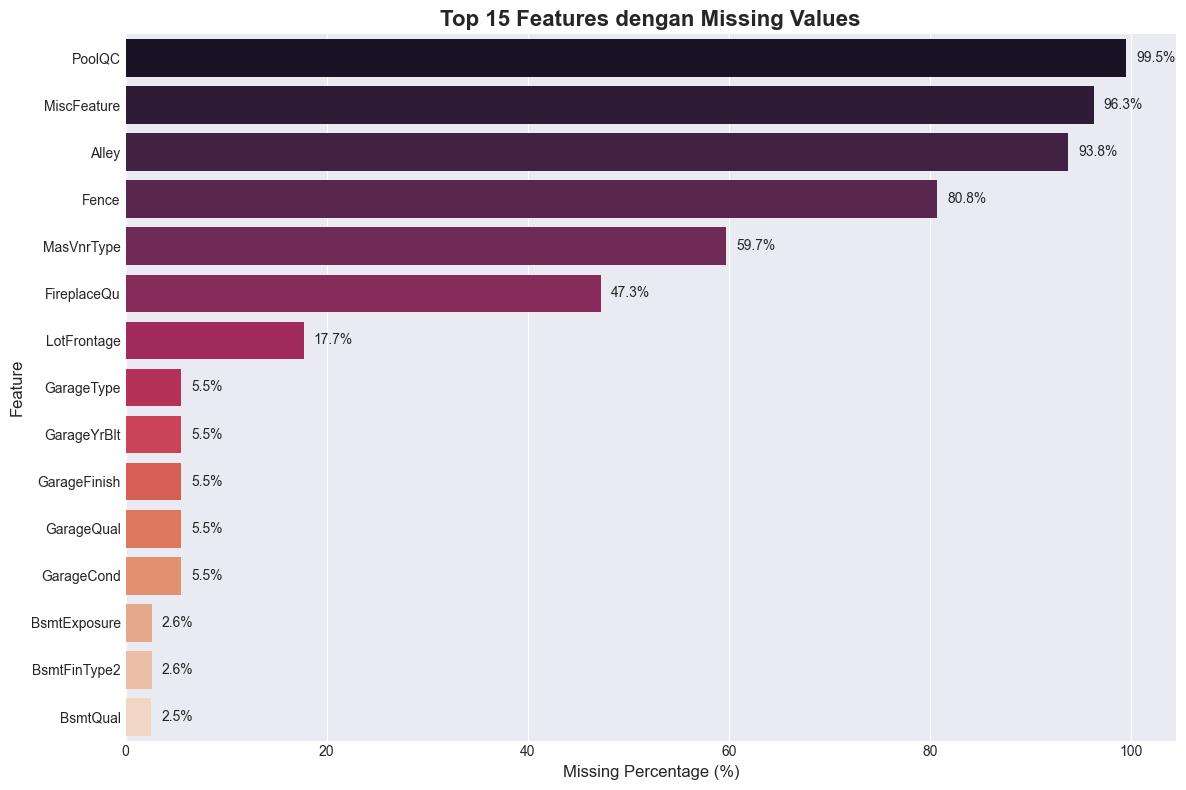


📌 Observation:
- PoolQC, MiscFeature, Alley memiliki missing values > 90%
- FireplaceQu, LotFrontage, GarageX features memiliki missing 5-20%
- Missing values perlu ditangani sesuai context (NA = 'None' untuk categorical)


In [5]:
# ===== MISSING VALUES ANALYSIS =====
print("\n" + "=" * 60)
print("📊 ANALISIS MISSING VALUES")
print("=" * 60 + "\n")

# Calculate missing values
missing = df_train.isnull().sum()
missing_percent = (missing / len(df_train)) * 100
missing_df = pd.DataFrame({
    'Feature': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percent': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percent', ascending=False)

print(f"Total features dengan missing values: {len(missing_df)}")
print(f"\nTop 10 Features dengan Missing Values:\n")
display(missing_df.head(10))

# Visualization
fig, ax = plt.subplots(figsize=(12, 8))
missing_df_plot = missing_df.head(15)
sns.barplot(data=missing_df_plot, y='Feature', x='Missing_Percent', palette='rocket', ax=ax)
ax.set_title('Top 15 Features dengan Missing Values', fontsize=16, fontweight='bold')
ax.set_xlabel('Missing Percentage (%)', fontsize=12)
ax.set_ylabel('Feature', fontsize=12)

for i, v in enumerate(missing_df_plot['Missing_Percent'].values):
    ax.text(v + 1, i, f'{v:.1f}%', va='center')

plt.tight_layout()
plt.show()

print("\n📌 Observation:")
print("- PoolQC, MiscFeature, Alley memiliki missing values > 90%")
print("- FireplaceQu, LotFrontage, GarageX features memiliki missing 5-20%")
print("- Missing values perlu ditangani sesuai context (NA = 'None' untuk categorical)")


📊 CORRELATION ANALYSIS

Total numerical features: 38

🔝 Top 10 Features dengan Korelasi Tertinggi terhadap SalePrice:

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

🔻 Top 10 Features dengan Korelasi Terendah terhadap SalePrice:

BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


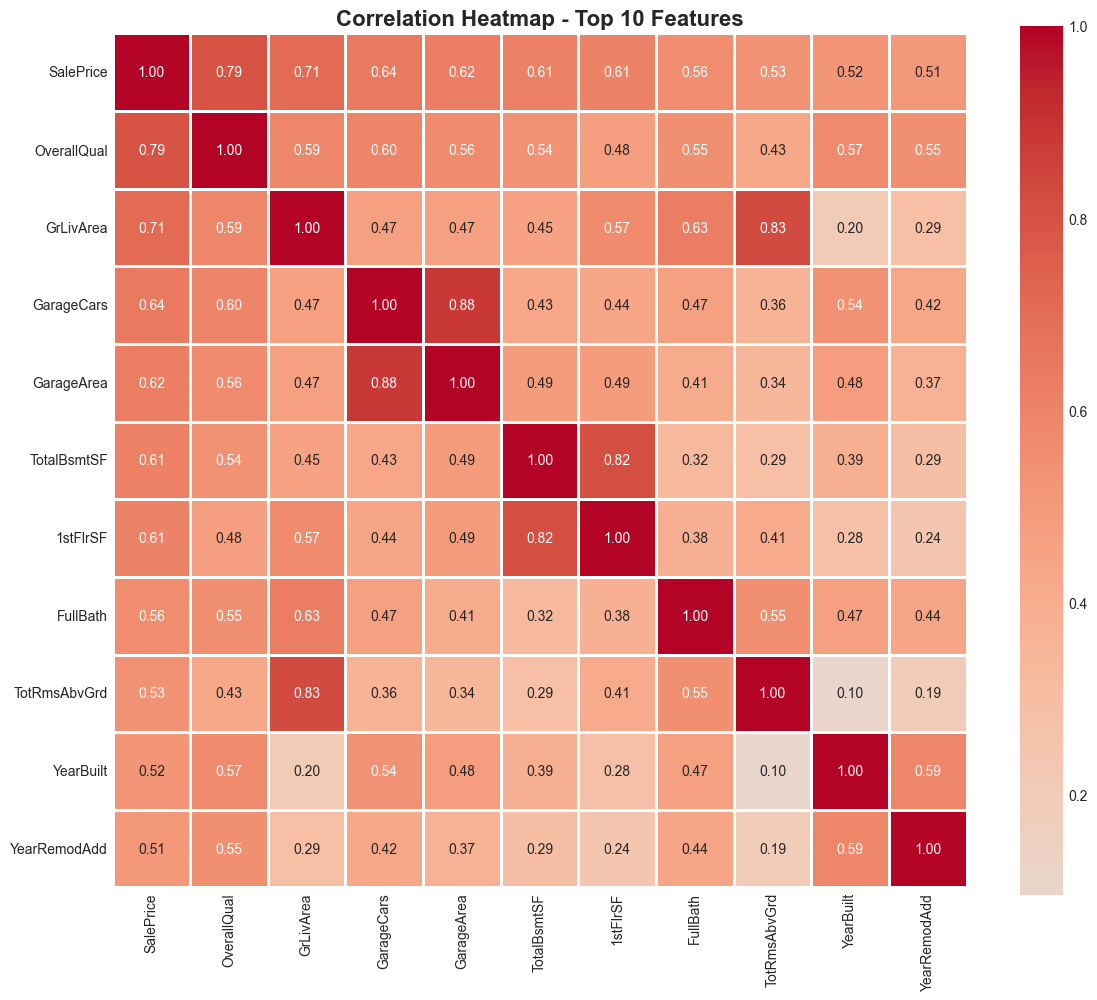

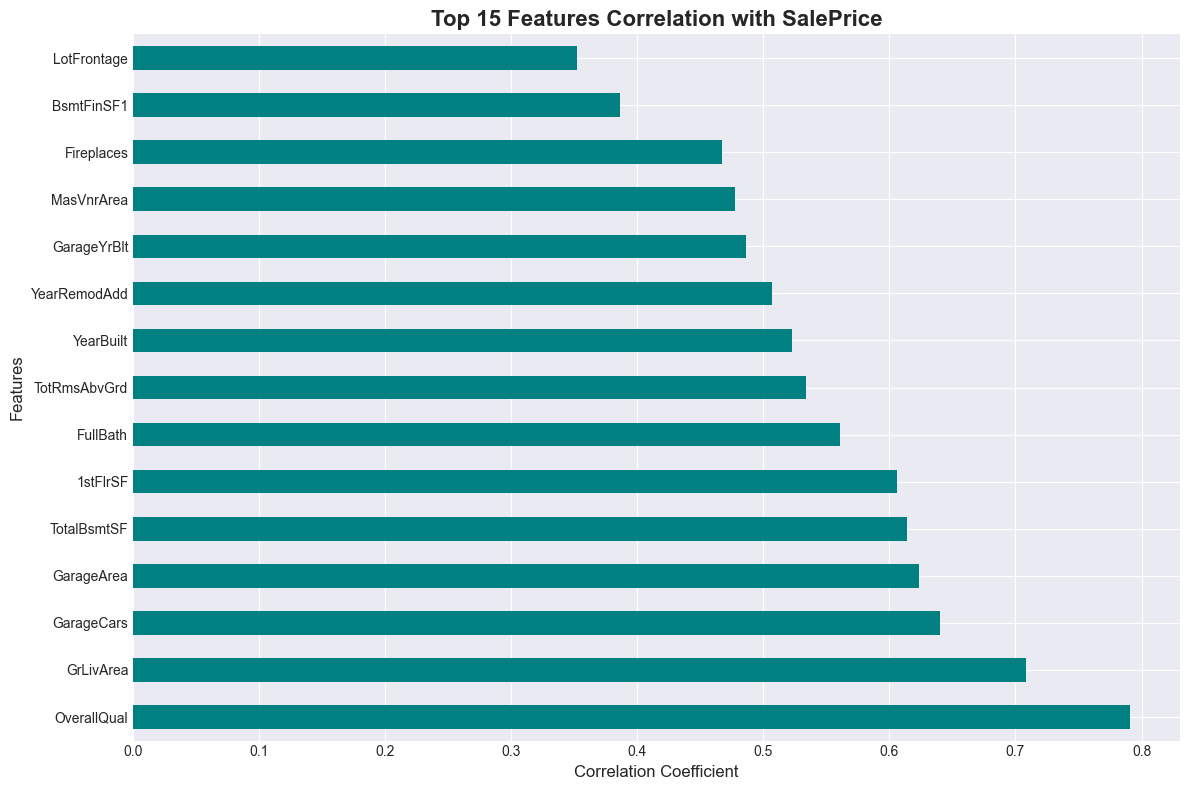


📌 Observation:
- OverallQual memiliki korelasi tertinggi (0.79)
- GrLivArea, GarageCars, GarageArea, TotalBsmtSF juga highly correlated
- Beberapa features memiliki multicollinearity (GarageCars vs GarageArea)


In [6]:
# ===== CORRELATION ANALYSIS =====
print("\n" + "=" * 60)
print("📊 CORRELATION ANALYSIS")
print("=" * 60 + "\n")

# Select only numerical features
numerical_features = df_train.select_dtypes(include=[np.number]).columns.tolist()
print(f"Total numerical features: {len(numerical_features)}")

# Calculate correlation with SalePrice
correlations = df_train[numerical_features].corr()['SalePrice'].sort_values(ascending=False)
print("\n🔝 Top 10 Features dengan Korelasi Tertinggi terhadap SalePrice:\n")
print(correlations.head(11))  # 11 karena include SalePrice sendiri

print("\n🔻 Top 10 Features dengan Korelasi Terendah terhadap SalePrice:\n")
print(correlations.tail(10))

# Visualization 1: Correlation heatmap (top features)
top_features = correlations.head(11).index.tolist()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_train[top_features].corr(), annot=True, cmap='coolwarm', 
            center=0, square=True, linewidths=1, ax=ax, fmt='.2f')
ax.set_title('Correlation Heatmap - Top 10 Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Visualization 2: Bar plot correlation
fig, ax = plt.subplots(figsize=(12, 8))
top_corr = correlations[1:16]  # Exclude SalePrice itself, top 15
top_corr.plot(kind='barh', ax=ax, color='teal')
ax.set_title('Top 15 Features Correlation with SalePrice', fontsize=16, fontweight='bold')
ax.set_xlabel('Correlation Coefficient', fontsize=12)
ax.set_ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

print("\n📌 Observation:")
print("- OverallQual memiliki korelasi tertinggi (0.79)")
print("- GrLivArea, GarageCars, GarageArea, TotalBsmtSF juga highly correlated")
print("- Beberapa features memiliki multicollinearity (GarageCars vs GarageArea)")


📊 RELATIONSHIP ANALYSIS: TOP FEATURES vs SalePrice



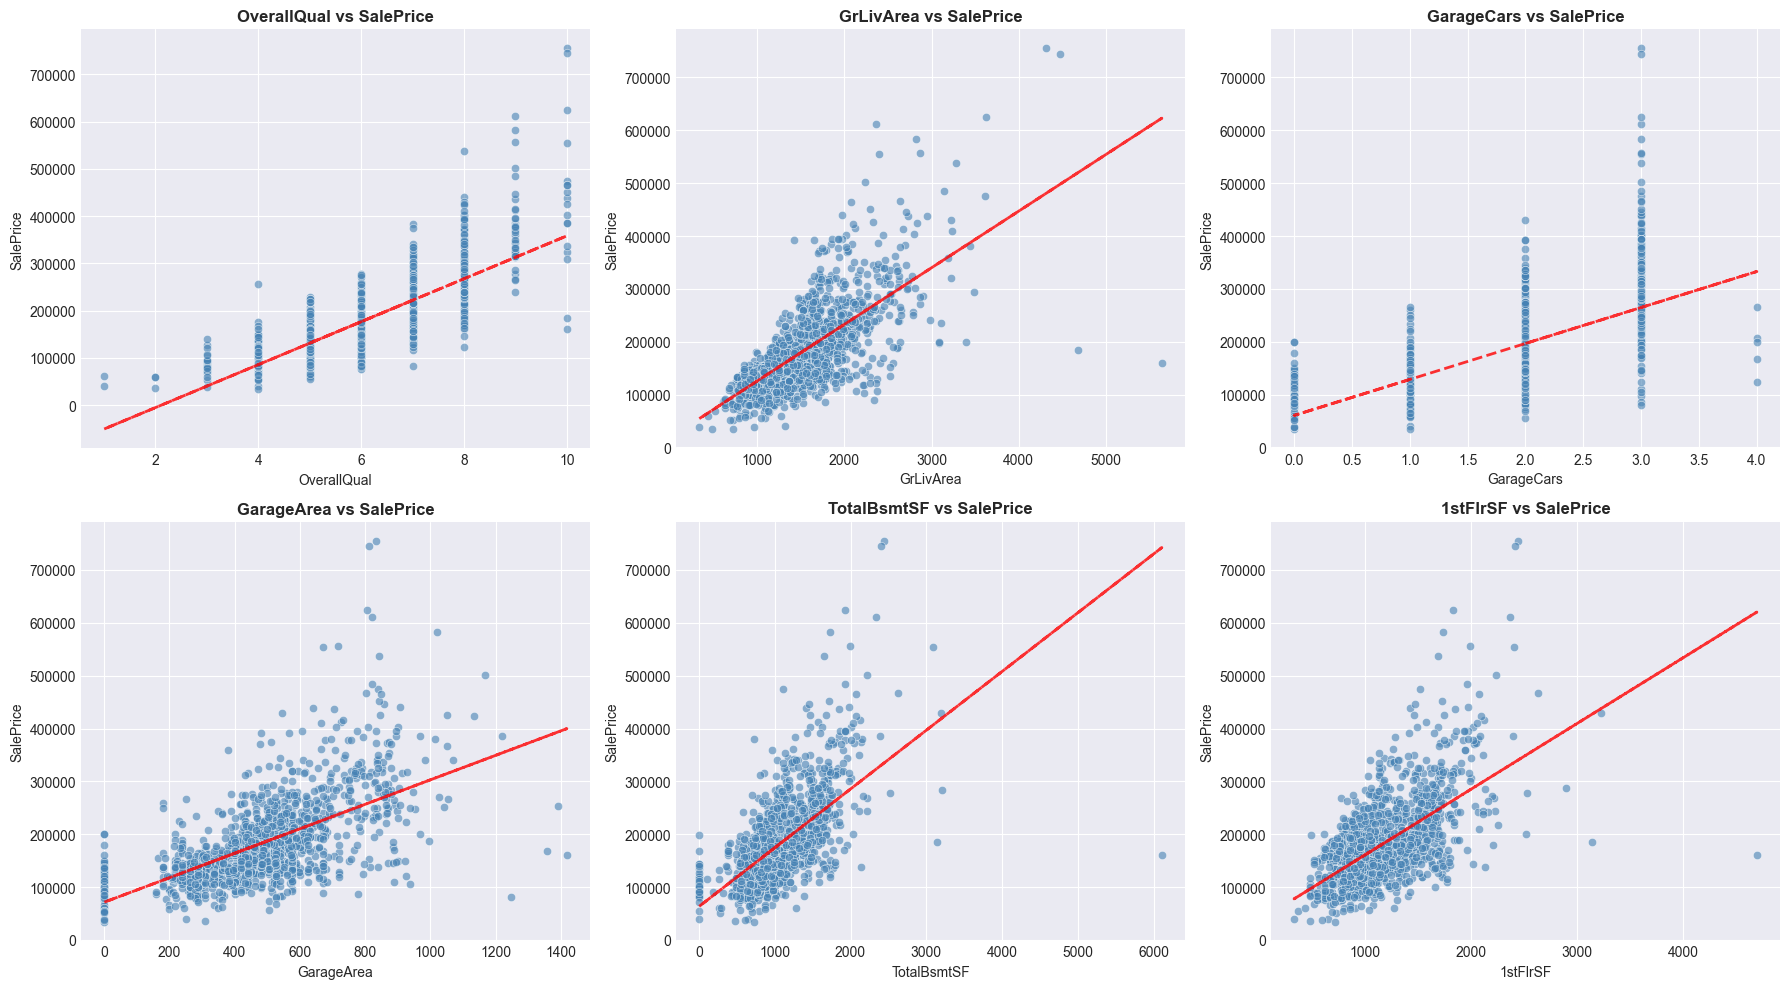

📌 Observation:
- Linear relationship antara top features dengan SalePrice
- Terdapat outliers yang perlu ditangani
- GrLivArea dan TotalBsmtSF menunjukkan strong positive correlation


In [7]:
# ===== SCATTER PLOTS: TOP FEATURES vs SalePrice =====
print("\n" + "=" * 60)
print("📊 RELATIONSHIP ANALYSIS: TOP FEATURES vs SalePrice")
print("=" * 60 + "\n")

# Top 6 features
top_6_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(top_6_features):
    sns.scatterplot(data=df_train, x=feature, y='SalePrice', ax=axes[idx], alpha=0.6, color='steelblue')
    axes[idx].set_title(f'{feature} vs SalePrice', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('SalePrice')
    
    # Add regression line
    z = np.polyfit(df_train[feature], df_train['SalePrice'], 1)
    p = np.poly1d(z)
    axes[idx].plot(df_train[feature], p(df_train[feature]), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

print("📌 Observation:")
print("- Linear relationship antara top features dengan SalePrice")
print("- Terdapat outliers yang perlu ditangani")
print("- GrLivArea dan TotalBsmtSF menunjukkan strong positive correlation")


📊 CATEGORICAL FEATURES ANALYSIS

Total categorical features: 43



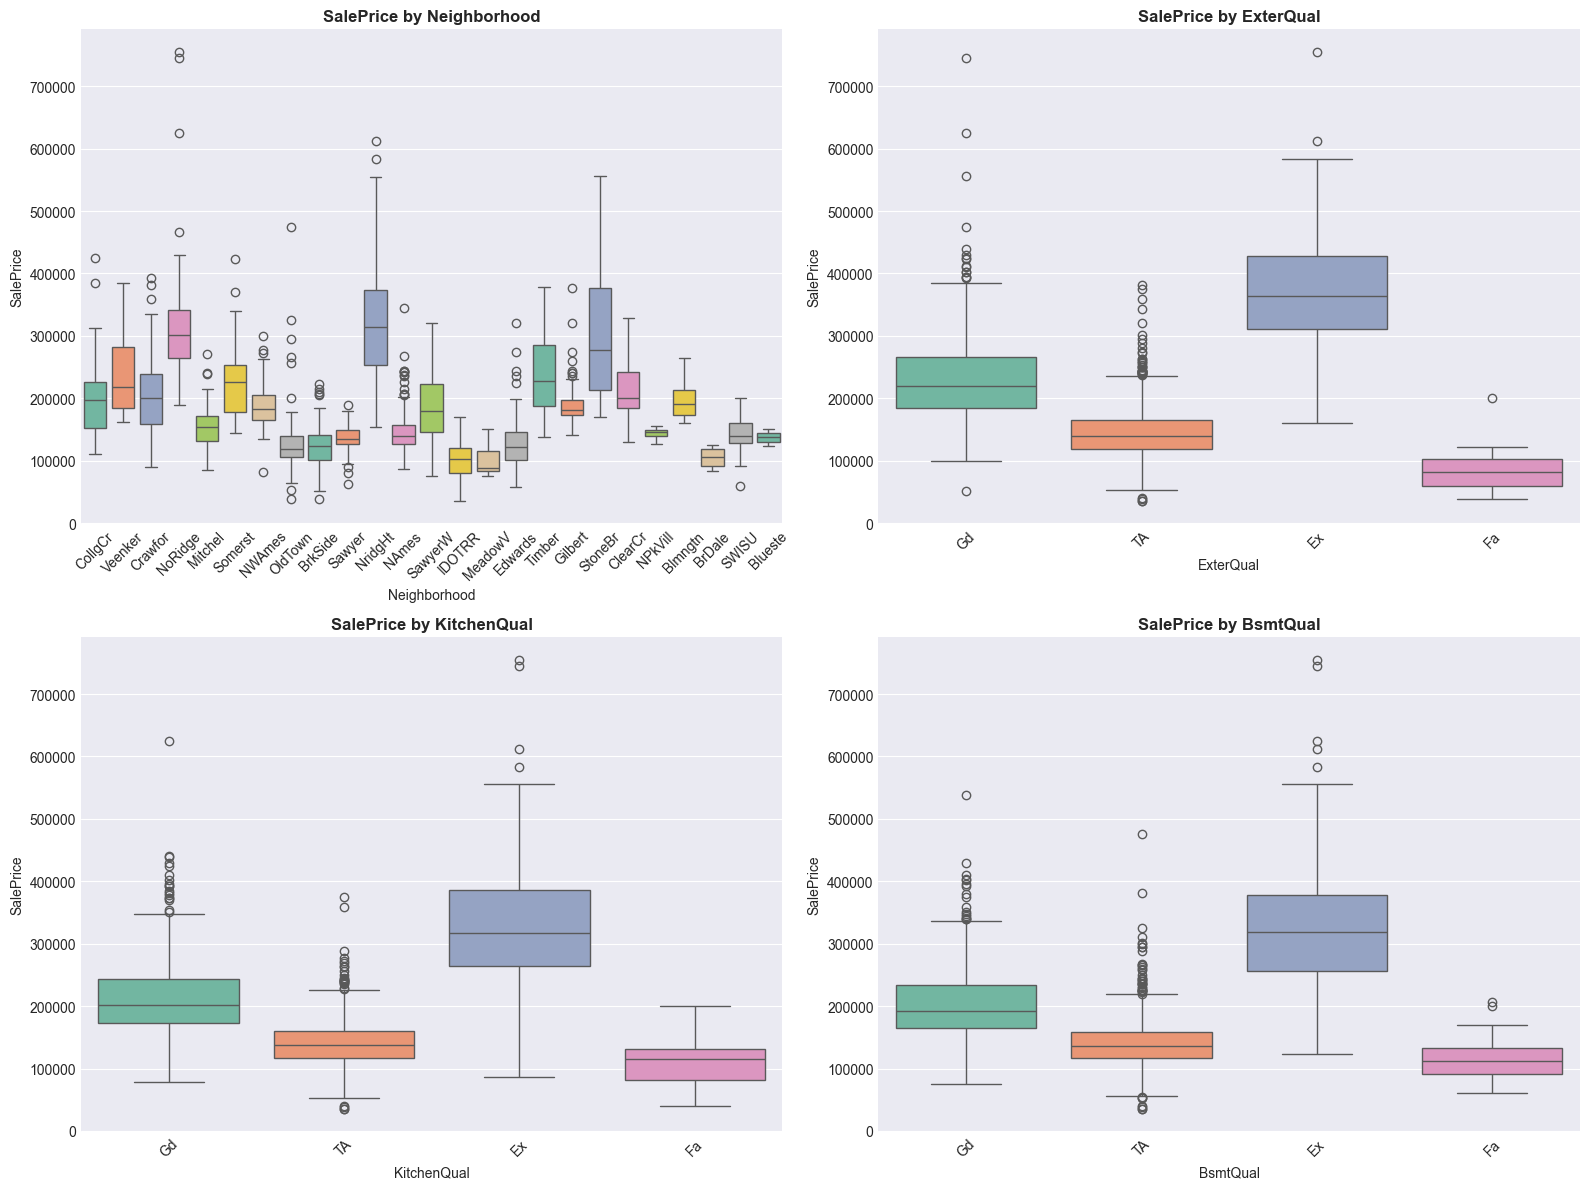

📌 Observation:
- Neighborhood memiliki impact signifikan terhadap SalePrice
- Quality features (ExterQual, KitchenQual) strongly influence price
- Categorical encoding diperlukan untuk modeling


In [8]:
# ===== CATEGORICAL FEATURES ANALYSIS =====
print("\n" + "=" * 60)
print("📊 CATEGORICAL FEATURES ANALYSIS")
print("=" * 60 + "\n")

# Get categorical features
categorical_features = df_train.select_dtypes(include=['object']).columns.tolist()
print(f"Total categorical features: {len(categorical_features)}\n")

# Analyze top categorical features impact on SalePrice
top_cat_features = ['Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, feature in enumerate(top_cat_features):
    # Calculate median SalePrice per category
    median_prices = df_train.groupby(feature)['SalePrice'].median().sort_values(ascending=False)
    
    sns.boxplot(data=df_train, x=feature, y='SalePrice', ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'SalePrice by {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('SalePrice')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("📌 Observation:")
print("- Neighborhood memiliki impact signifikan terhadap SalePrice")
print("- Quality features (ExterQual, KitchenQual) strongly influence price")
print("- Categorical encoding diperlukan untuk modeling")


📊 OUTLIERS DETECTION

Outliers Count per Feature:
  GrLivArea: 31 outliers (2.12%)
  TotalBsmtSF: 61 outliers (4.18%)
  LotArea: 69 outliers (4.73%)
  1stFlrSF: 20 outliers (1.37%)
  GarageArea: 21 outliers (1.44%)


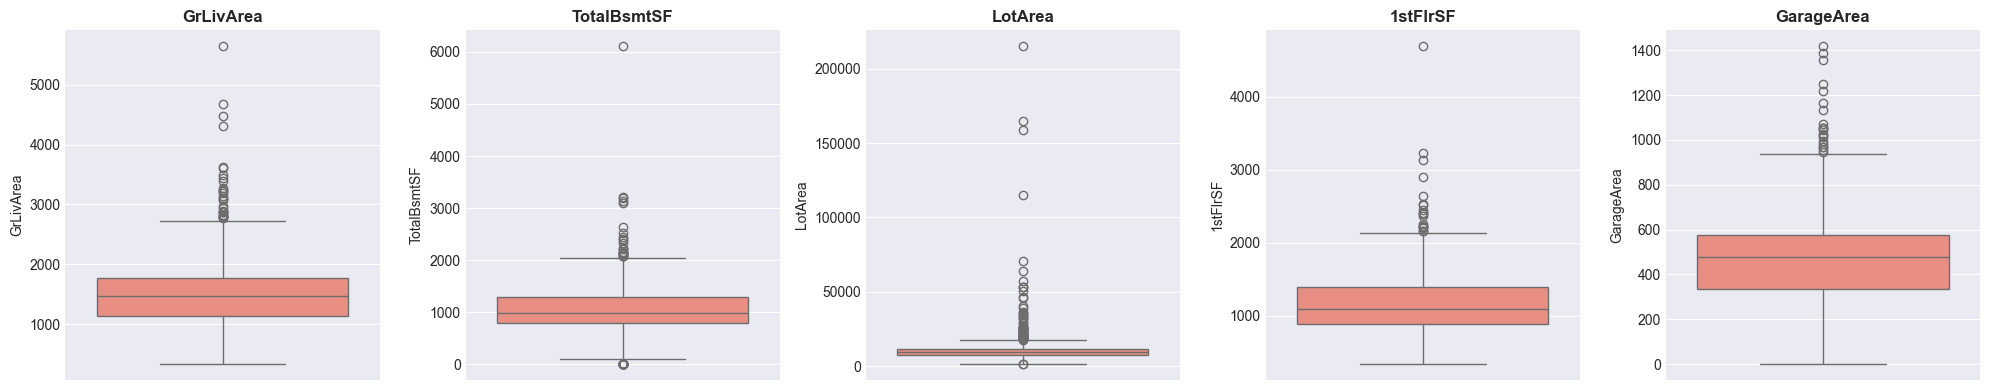


📌 Observation:
- GrLivArea dan LotArea memiliki outliers signifikan
- Outliers perlu dianalisis context-nya (legitimate vs error)
- Strategi: Remove extreme outliers, keep reasonable ones


In [9]:
# ===== OUTLIERS DETECTION =====
print("\n" + "=" * 60)
print("📊 OUTLIERS DETECTION")
print("=" * 60 + "\n")

# Function to detect outliers using IQR method
def detect_outliers_iqr(df, features):
    outliers_dict = {}
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        outliers_dict[feature] = len(outliers)
    
    return outliers_dict

# Detect outliers in top numerical features
outlier_features = ['GrLivArea', 'TotalBsmtSF', 'LotArea', '1stFlrSF', 'GarageArea']
outliers_count = detect_outliers_iqr(df_train, outlier_features)

print("Outliers Count per Feature:")
for feature, count in outliers_count.items():
    print(f"  {feature}: {count} outliers ({count/len(df_train)*100:.2f}%)")

# Visualization: Box plots
fig, axes = plt.subplots(1, len(outlier_features), figsize=(20, 4))

for idx, feature in enumerate(outlier_features):
    sns.boxplot(y=df_train[feature], ax=axes[idx], color='salmon')
    axes[idx].set_title(f'{feature}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📌 Observation:")
print("- GrLivArea dan LotArea memiliki outliers signifikan")
print("- Outliers perlu dianalisis context-nya (legitimate vs error)")
print("- Strategi: Remove extreme outliers, keep reasonable ones")

In [10]:
# ===== FEATURE ENGINEERING IDEAS =====
print("\n" + "=" * 60)
print("💡 FEATURE ENGINEERING IDEAS")
print("=" * 60 + "\n")

print("Berdasarkan EDA, beberapa feature engineering yang bisa dilakukan:")
print("\n1. **Total Square Footage:**")
print("   - TotalSF = TotalBsmtSF + 1stFlrSF + 2ndFlrSF")
print("   - Menggabungkan total luas rumah")

print("\n2. **Total Bathrooms:**")
print("   - TotalBath = FullBath + 0.5*HalfBath + BsmtFullBath + 0.5*BsmtHalfBath")
print("   - Agregasi semua bathroom")

print("\n3. **Age Features:**")
print("   - HouseAge = YrSold - YearBuilt")
print("   - RemodAge = YrSold - YearRemodAdd")

print("\n4. **Has Feature (Binary):**")
print("   - HasPool = 1 if PoolArea > 0 else 0")
print("   - Has2ndFloor = 1 if 2ndFlrSF > 0 else 0")
print("   - HasGarage = 1 if GarageArea > 0 else 0")

print("\n5. **Quality * Area:**")
print("   - OverallQual_x_GrLivArea")
print("   - Interaction features")

print("\n6. **Log Transformation:**")
print("   - Log(SalePrice) untuk normalisasi target")
print("   - Log transform skewed features")

print("\n✅ Features ini akan diimplementasikan di preprocessing step!")


💡 FEATURE ENGINEERING IDEAS

Berdasarkan EDA, beberapa feature engineering yang bisa dilakukan:

1. **Total Square Footage:**
   - TotalSF = TotalBsmtSF + 1stFlrSF + 2ndFlrSF
   - Menggabungkan total luas rumah

2. **Total Bathrooms:**
   - TotalBath = FullBath + 0.5*HalfBath + BsmtFullBath + 0.5*BsmtHalfBath
   - Agregasi semua bathroom

3. **Age Features:**
   - HouseAge = YrSold - YearBuilt
   - RemodAge = YrSold - YearRemodAdd

4. **Has Feature (Binary):**
   - HasPool = 1 if PoolArea > 0 else 0
   - Has2ndFloor = 1 if 2ndFlrSF > 0 else 0
   - HasGarage = 1 if GarageArea > 0 else 0

5. **Quality * Area:**
   - OverallQual_x_GrLivArea
   - Interaction features

6. **Log Transformation:**
   - Log(SalePrice) untuk normalisasi target
   - Log transform skewed features

✅ Features ini akan diimplementasikan di preprocessing step!


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [11]:
# ===== DATA PREPROCESSING =====
print("=" * 60)
print("5. DATA PREPROCESSING")
print("=" * 60)

# Create copy untuk preprocessing
df = df_train.copy()

print("\n🔧 STEP 1: HANDLING MISSING VALUES\n")

# Strategy untuk missing values berdasarkan context
# Reference: data_description.txt dari Kaggle

# Categorical features: NA means "None" or "No Feature"
categorical_na_none = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'MasVnrType'
]

for col in categorical_na_none:
    df[col].fillna('None', inplace=True)
    print(f"✅ {col}: Filled with 'None'")

# Numerical features: NA means 0 (no feature)
numerical_na_zero = [
    'GarageYrBlt', 'GarageArea', 'GarageCars',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
    'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'
]

for col in numerical_na_zero:
    df[col].fillna(0, inplace=True)
    print(f"✅ {col}: Filled with 0")

# LotFrontage: Fill with median per Neighborhood
print("\n✅ LotFrontage: Filled with neighborhood median")
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

# Remaining categorical: Fill with mode
remaining_categorical = df.select_dtypes(include=['object']).columns
for col in remaining_categorical:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)
        print(f"✅ {col}: Filled with mode")

# Remaining numerical: Fill with median
remaining_numerical = df.select_dtypes(include=[np.number]).columns
for col in remaining_numerical:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
        print(f"✅ {col}: Filled with median")

# Verify
print(f"\n✅ Total missing values after imputation: {df.isnull().sum().sum()}")

5. DATA PREPROCESSING

🔧 STEP 1: HANDLING MISSING VALUES

✅ PoolQC: Filled with 'None'
✅ MiscFeature: Filled with 'None'
✅ Alley: Filled with 'None'
✅ Fence: Filled with 'None'
✅ FireplaceQu: Filled with 'None'
✅ GarageType: Filled with 'None'
✅ GarageFinish: Filled with 'None'
✅ GarageQual: Filled with 'None'
✅ GarageCond: Filled with 'None'
✅ BsmtQual: Filled with 'None'
✅ BsmtCond: Filled with 'None'
✅ BsmtExposure: Filled with 'None'
✅ BsmtFinType1: Filled with 'None'
✅ BsmtFinType2: Filled with 'None'
✅ MasVnrType: Filled with 'None'
✅ GarageYrBlt: Filled with 0
✅ GarageArea: Filled with 0
✅ GarageCars: Filled with 0
✅ BsmtFinSF1: Filled with 0
✅ BsmtFinSF2: Filled with 0
✅ BsmtUnfSF: Filled with 0
✅ TotalBsmtSF: Filled with 0
✅ BsmtFullBath: Filled with 0
✅ BsmtHalfBath: Filled with 0
✅ MasVnrArea: Filled with 0

✅ LotFrontage: Filled with neighborhood median
✅ Electrical: Filled with mode

✅ Total missing values after imputation: 0


In [12]:
# ===== FEATURE ENGINEERING =====
print("\n🔧 STEP 2: FEATURE ENGINEERING\n")

# 1. Total Square Footage
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
print("✅ Created: TotalSF")

# 2. Total Bathrooms
df['TotalBath'] = (df['FullBath'] + 0.5 * df['HalfBath'] + 
                   df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath'])
print("✅ Created: TotalBath")

# 3. House Age
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
print("✅ Created: HouseAge, RemodAge")

# 4. Binary features
df['HasPool'] = (df['PoolArea'] > 0).astype(int)
df['Has2ndFloor'] = (df['2ndFlrSF'] > 0).astype(int)
df['HasGarage'] = (df['GarageArea'] > 0).astype(int)
df['HasBsmt'] = (df['TotalBsmtSF'] > 0).astype(int)
df['HasFireplace'] = (df['Fireplaces'] > 0).astype(int)
print("✅ Created: Binary features (HasPool, Has2ndFloor, etc.)")

# 5. Interaction features
df['OverallQual_x_GrLivArea'] = df['OverallQual'] * df['GrLivArea']
df['OverallQual_x_TotalSF'] = df['OverallQual'] * df['TotalSF']
print("✅ Created: Interaction features")

# 6. Porch Total
df['TotalPorchSF'] = (df['OpenPorchSF'] + df['EnclosedPorch'] + 
                      df['3SsnPorch'] + df['ScreenPorch'])
print("✅ Created: TotalPorchSF")

print(f"\n✅ Total features after engineering: {df.shape[1]}")


🔧 STEP 2: FEATURE ENGINEERING

✅ Created: TotalSF
✅ Created: TotalBath
✅ Created: HouseAge, RemodAge
✅ Created: Binary features (HasPool, Has2ndFloor, etc.)
✅ Created: Interaction features
✅ Created: TotalPorchSF

✅ Total features after engineering: 93


In [13]:
# ===== OUTLIERS REMOVAL =====
print("\n🔧 STEP 3: OUTLIERS REMOVAL\n")

print(f"Original data shape: {df.shape}")

# Remove extreme outliers based on EDA findings
# GrLivArea: Remove houses with > 4000 sq ft and low price
outliers_grliv = df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)]
print(f"Removing {len(outliers_grliv)} outliers from GrLivArea")
df = df.drop(outliers_grliv.index)

# LotArea: Remove extreme large lots
outliers_lot = df[df['LotArea'] > 100000]
print(f"Removing {len(outliers_lot)} outliers from LotArea")
df = df.drop(outliers_lot.index)

# TotalBsmtSF: Remove extreme values
outliers_bsmt = df[df['TotalBsmtSF'] > 6000]
print(f"Removing {len(outliers_bsmt)} outliers from TotalBsmtSF")
df = df.drop(outliers_bsmt.index)

print(f"\n✅ Data shape after outlier removal: {df.shape}")
print(f"✅ Removed {len(df_train) - len(df)} outliers ({(len(df_train) - len(df))/len(df_train)*100:.2f}%)")


🔧 STEP 3: OUTLIERS REMOVAL

Original data shape: (1460, 93)
Removing 2 outliers from GrLivArea
Removing 4 outliers from LotArea
Removing 0 outliers from TotalBsmtSF

✅ Data shape after outlier removal: (1454, 93)
✅ Removed 6 outliers (0.41%)


In [14]:
# ===== LOG TRANSFORMATION =====
print("\n🔧 STEP 4: LOG TRANSFORMATION\n")

# Log transform the target variable
df['SalePrice'] = np.log1p(df['SalePrice'])
print("✅ SalePrice: Log transformed")

# Identify skewed numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns
numerical_features = numerical_features.drop(['Id'])  # Exclude Id

skewed_features = df[numerical_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[abs(skewed_features) > 0.5]

print(f"\n📊 Features dengan high skewness (> 0.5): {len(high_skew)}")
print("\nTop 10 Skewed Features:")
print(high_skew.head(10))

# Log transform highly skewed features
for feature in high_skew.index:
    if feature != 'SalePrice':  # Already transformed
        df[feature] = np.log1p(df[feature])

print(f"\n✅ Log transformed {len(high_skew)-1} skewed features")


🔧 STEP 4: LOG TRANSFORMATION

✅ SalePrice: Log transformed

📊 Features dengan high skewness (> 0.5): 38

Top 10 Skewed Features:
MiscVal         24.469277
PoolArea        15.910404
HasPool         15.470536
3SsnPorch       10.272009
LowQualFinSF     8.982890
KitchenAbvGr     4.473226
BsmtFinSF2       4.279205
BsmtHalfBath     4.121397
ScreenPorch      4.108107
LotArea          3.932476
dtype: float64

✅ Log transformed 37 skewed features


In [15]:
# ===== CATEGORICAL ENCODING =====
print("\n🔧 STEP 5: CATEGORICAL ENCODING\n")

# Get categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(f"Total categorical features: {len(categorical_features)}")

# Label Encoding untuk ordinal features
ordinal_features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                    'HeatingQC', 'KitchenQual', 'FireplaceQu', 
                    'GarageQual', 'GarageCond', 'PoolQC']

quality_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

for feature in ordinal_features:
    if feature in df.columns:
        df[feature] = df[feature].map(quality_map)
        print(f"✅ {feature}: Label encoded (quality mapping)")

# One-Hot Encoding untuk nominal features
nominal_features = [f for f in categorical_features if f not in ordinal_features]

print(f"\n🔄 One-Hot Encoding {len(nominal_features)} nominal features...")
df = pd.get_dummies(df, columns=nominal_features, drop_first=True)

print(f"\n✅ Total features after encoding: {df.shape[1]}")


🔧 STEP 5: CATEGORICAL ENCODING

Total categorical features: 43
✅ ExterQual: Label encoded (quality mapping)
✅ ExterCond: Label encoded (quality mapping)
✅ BsmtQual: Label encoded (quality mapping)
✅ BsmtCond: Label encoded (quality mapping)
✅ HeatingQC: Label encoded (quality mapping)
✅ KitchenQual: Label encoded (quality mapping)
✅ FireplaceQu: Label encoded (quality mapping)
✅ GarageQual: Label encoded (quality mapping)
✅ GarageCond: Label encoded (quality mapping)
✅ PoolQC: Label encoded (quality mapping)

🔄 One-Hot Encoding 33 nominal features...

✅ Total features after encoding: 242


In [16]:
# ===== TRAIN-TEST SPLIT =====
print("\n🔧 STEP 6: TRAIN-TEST SPLIT & SCALING\n")

# Separate features and target
X = df.drop(['SalePrice', 'Id'], axis=1)
y = df['SalePrice']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n✅ Training set: {X_train.shape[0]} samples")
print(f"✅ Test set: {X_test.shape[0]} samples")

# Scaling using RobustScaler (better for outliers)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("\n✅ Features scaled using RobustScaler")


🔧 STEP 6: TRAIN-TEST SPLIT & SCALING

Features shape: (1454, 240)
Target shape: (1454,)

✅ Training set: 1163 samples
✅ Test set: 291 samples

✅ Features scaled using RobustScaler


In [17]:
# ===== SAVE PREPROCESSED DATA =====
print("\n🔧 STEP 7: SAVE PREPROCESSED DATA\n")

# Create output directory
output_dir = 'dataset_preprocessing'
os.makedirs(output_dir, exist_ok=True)

# Combine features and target for saving
train_processed = X_train_scaled.copy()
train_processed['SalePrice'] = y_train

test_processed = X_test_scaled.copy()
test_processed['SalePrice'] = y_test

# Save to CSV
train_processed.to_csv(f'{output_dir}/train_processed.csv', index=False)
test_processed.to_csv(f'{output_dir}/test_processed.csv', index=False)

# Save scaler for later use
with open(f'{output_dir}/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print(f"✅ Preprocessed training data saved: {output_dir}/train_processed.csv")
print(f"✅ Preprocessed test data saved: {output_dir}/test_processed.csv")
print(f"✅ Scaler saved: {output_dir}/scaler.pkl")

print("\n" + "=" * 60)
print("🎉 PREPROCESSING COMPLETED SUCCESSFULLY!")
print("=" * 60)
print(f"\n📊 Final Dataset Shape:")
print(f"   - Training: {train_processed.shape}")
print(f"   - Test: {test_processed.shape}")
print(f"   - Total Features: {len(X_train.columns)}")
print(f"\n✅ Data siap untuk modeling!")


🔧 STEP 7: SAVE PREPROCESSED DATA

✅ Preprocessed training data saved: dataset_preprocessing/train_processed.csv
✅ Preprocessed test data saved: dataset_preprocessing/test_processed.csv
✅ Scaler saved: dataset_preprocessing/scaler.pkl

🎉 PREPROCESSING COMPLETED SUCCESSFULLY!

📊 Final Dataset Shape:
   - Training: (1163, 241)
   - Test: (291, 241)
   - Total Features: 240

✅ Data siap untuk modeling!
